# __Epidemiological Analysis Visualisations__
         Looking into distribution patterns within a population system: 
      Who, Where and When & linking it to food source attribution What
***

In [94]:
#imported libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

In [34]:
#import file with patient metadata and isolate information
human = pd.read_excel("/directory/file.xlsx", index_col=[0])

# 0. Pre Analysis

## Cleaning data, deduplicating datasets

* Remove repeated isolates
* Mother-infant pairs treated as a single data entry
* Remove quality isoaltes

In [35]:
human = human.drop(human.loc[human["Outbreak/Food source link"]=="IQA"].index)

For Mother-Infant pairs:
Use t5 SNP difference distance to identify isolates with the same digit code profile

In [36]:
#view top 10 items of list isolates with the same t5 SNP adress
human["SNP Level 5"].value_counts().head(10)

 1.1.11.11.11.11         5
 1.53.182.274.285.297    4
 1.1.5.44.44.44          3
 1.1.5.178.180.181       2
 1.95.317.353.383.404    2
 1.1.20.20.346.363       2
 1.1.10.13.103.104       1
 1.1.322.358.389.410     1
 1.1.324.361.393.415     1
 1.1.328.365.399.432     1
Name: SNP Level 5, dtype: int64

In [ ]:
#remove isolates with drop
human.loc[human["snp"].str.contains("snpID")]
human = human.drop("isolatesID")

# 1. Who

## Calculate age from patients date of birth and sample collection date

In [38]:
#"Receipt Date" is the sequence collection date
#Alter type of "Receipt Date" and patients "Date of Birth" data into numrical dates with datetime.
human["Receipt Date"] = pd.to_datetime(human["Receipt Date"], format="%Y-%m-%d")
human["Date of birth"] = pd.to_datetime(human["Date of birth"], format="%Y-%m-%d")

#format diplay of dates into Years and Months only
human["Receipt M-Y"] = pd.to_datetime(human["Receipt Date"], 
                                      format="%Y-%m").dt.to_period("m")
#calculate patient's age
human["Age"] = ((human["Receipt Date"] - human["Date of birth"])/ 
                timedelta(days=365)).round(0)

## Create horizontal pyramid bar plot to visualise patient distribution across age groups

In [39]:
#subselect Age and Sex data from original human dataset
pop = human[["Age", "Sex"]]

#### Create table with sex, age groups and number of cases

In [40]:
#create number of bins for each bracket
bins=[-1,1,6,10,19,29,39,49,58,68,78,88,105]

#label each bin with age bracket
labels = ['0',"1-5",'6-10','11-19','20-29','30-39','40-49','50-59','60-69','70-79', "80-89", "90+"]

#create column named "Age Groups", which contains the labels of the bins generated
pop["Age Groups"] = pd.cut(pop["Age"], bins, labels=labels)

#group data according to sex
a = pop.groupby("Sex")

#calculate the occurences of each age group bin
a = a["Age Groups"].value_counts().sort_index().to_frame().reset_index()

#rename columns
a.columns= ["Sex", "Age Groups", "Num Isolates"]
a

/tmp/ipykernel_31230/3581985480.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop["Age Groups"] = pd.cut(pop["Age"], bins, labels=labels)


,Sex,Age Groups,Num Isolates
0,F,0,3
1,F,1-5,0
2,F,6-10,0
3,F,11-19,1
4,F,20-29,3
5,F,30-39,8
6,F,40-49,1
7,F,50-59,1
8,F,60-69,3
9,F,70-79,3


In [41]:
#restructure orientation of df for graph
a = a.pivot(index='Age Groups', columns="Sex", values="Num Isolates")
a

Sex,F,M
Age Groups,,
0,3,4
1-5,0,0
6-10,0,0
11-19,1,0
20-29,3,2
30-39,8,2
40-49,1,3
50-59,1,2
60-69,3,4


# Plot horizontal pyramid bar plot

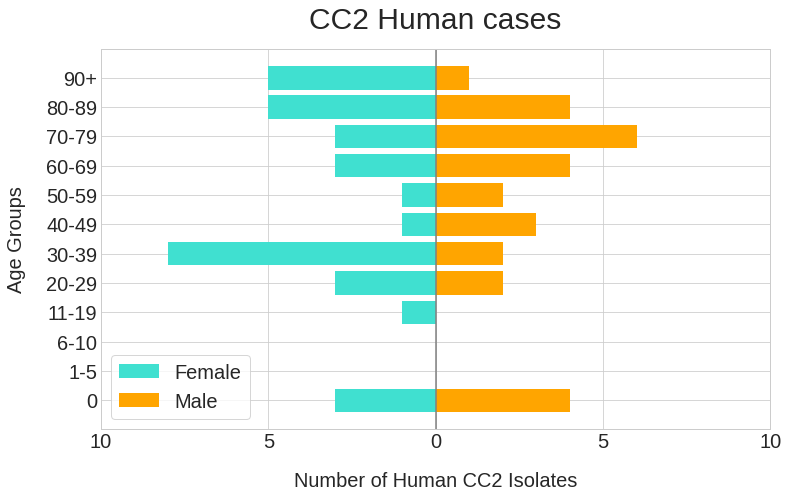

In [42]:
#library for seaborn pallet use 
plt.style.use("seaborn-whitegrid")

#define size of figure
plt.figure(figsize=(12,7))

#matrix with number of cases
no_cases = a.values

#setting y value as the label name of each age bracket
y = a.index

#setting x1 and x2 values as the male and female number of cases per age bracket
x_f= a["F"]*(-1)
x_m= a["M"] 

#matplotlib horizontal bar plot - plotting male and female cases sepatetly
plt.barh(y, x_f, align='center', color='turquoise', label="Female")
plt.barh(y, x_m, align='center', color='orange', label="Male")

#setting x-axis markers and labels
xtickval = [-10, -5, 0, 5, 10]
xticknames = ["10", "5", "0", "5", "10"]
plt.xticks(xtickval, xticknames, fontsize=20)

#setting font for y-axis marker labels
plt.yticks(fontsize=20)

#setting labels for x and y-axis
plt.xlabel("Number of Human CC2 Isolates", fontsize=20, labelpad=20)
plt.ylabel("Age Groups", fontsize=20, labelpad=20)

#setting parameters for legend displayed within the graph
plt.legend(loc="lower left", frameon=True, fontsize=20)

#setting header for figure
plt.title("CC2 Human cases", fontsize=30, pad=20)

#inserting grid on graph
plt.grid(True)

#adjusting the x-axis separating female to male bars
plt.axvline(x=0, linestyle="-",color="gray")

#display figure
plt.show()

# Clinical severity:
# Adding clinical outcome (recorded deaths) to patient distribution pyramid plot

In [43]:
#subselect age, sex and clinical outcome ("Death") from origincal dataset
ages_death = human[["Age", "Sex","Death"]]

same process followed as previous section, however the dataset are now grouped by Death and Sex

In [44]:
s_d_a_iso = ages_death.groupby(["Death", "Sex"])

/tmp/ipykernel_31230/272292402.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ages_death["Age Groups"] = pd.cut(ages_death["Age"], bins, labels=labels)


,Death,Sex,Age Groups,Num Isolates
0,N,F,0,1
1,N,F,1-5,0
2,N,F,6-10,0
3,N,F,11-19,1
4,N,F,20-29,1
...,...,...,...,...
79,Y,M,50-59,0
80,Y,M,60-69,2
81,Y,M,70-79,2
82,Y,M,80-89,2


In [45]:
#reset orientation of df 
s_d_a_iso = s_d_a_iso.pivot(index='Age Groups', columns=["Sex", "Death"], 
                            values="Num Isolates")
s_d_a_iso

Sex         F  M  F     M  F  M
Death       N  N PD  U  U  Y  Y
Age Groups                     
0           1  3  1  1  1  0  0
1-5         0  0  0  0  0  0  0
6-10        0  0  0  0  0  0  0
11-19       1  0  0  0  0  0  0
20-29       1  2  2  0  0  0  0
30-39       6  1  2  0  0  0  1
40-49       0  2  1  0  1  0  0
50-59       1  2  0  0  0  0  0
60-69       1  2  0  0  0  2  2
70-79       2  4  0  0  0  1  2
80-89       3  2  0  1  0  1  2
90+         3  0  0  0  0  2  1

#### Pyramid plot with clinical outcome

/tmp/ipykernel_31230/4184849048.py:47: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  leg = plt.legend(b1, labels=["Alive Records","Unknown Outcome", "Deceased cases",


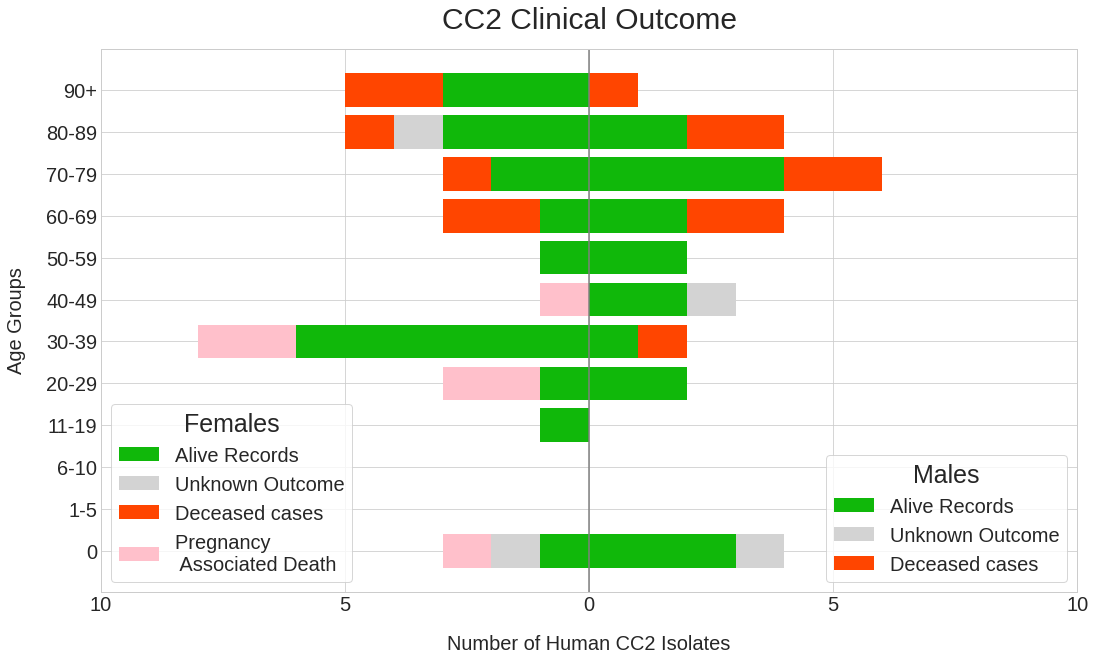

In [50]:
#library for plot pallet with seaborn
plt.style.use("seaborn-whitegrid")

#setting figure size
fig, ax = plt.subplots(figsize=(17.5,10))

#setting parameters for figure and subplots
plt.rcParams["hatch.color"]="floralwhite"
plt.rcParams["hatch.linewidth"]= 4
plt.rcParams["legend.title_fontsize"]=25

#setting x and y variables for plot
y = s_d_a_iso.index

x_f1= s_d_a_iso["F"]["N"]*(-1)
x_f2= s_d_a_iso["F"]["U"]*(-1)
x_f3= s_d_a_iso["F"]["Y"]*(-1)
x_f4= s_d_a_iso["F"]["PD"]*(-1)

x_m1 = s_d_a_iso["M"]["N"]
x_m2 = s_d_a_iso["M"]["U"]
x_m3 = s_d_a_iso["M"]["Y"]

#horizontal bar plot for females
plt.barh(y,x_f1, align='center', color= "#10b80a", label="Alive cases")
plt.barh(y,x_f2, left=x_f1, align='center', color='lightgray', label="Unknown Outcome")
plt.barh(y,x_f3, left=x_f1+x_f2, align='center', color='orangered', label="Deceased cases")
plt.barh(y,x_f4, left=x_f1+x_f2+x_f3, align='center', color='pink', label="Pregnancy Associated Death")

#horizontal bar plot for males
b1 = plt.barh(y,x_m1, align='center', color='#10b80a', label="Alive Records")
b2 = plt.barh(y,x_m2, left=x_m1, align='center', color='lightgray', label="Unknown Outcome")
b3 = plt.barh(y,x_m3, left=x_m1+x_m2, align='center', color='orangered', label="Deceased cases")

#setting x and y-axis as in previous plot
xtickval = [-10, -5, 0, 5, 10]
xticknames = ["10", "5", "0", "5", "10"]
plt.xticks(xtickval, xticknames, fontsize=20)
plt.yticks(fontsize=20)

#axis labels
plt.xlabel("Number of Human CC2 Isolates", fontsize=20, labelpad=20)
plt.ylabel("Age Groups", fontsize=20, labelpad=20)

#setting two legends for each sex
#legend for females
leg = plt.legend(b1, labels=["Alive Records","Unknown Outcome", "Deceased cases", 
                         "Pregnancy \n Associated Death"],
                 loc="lower left", frameon=True, fontsize=20, title="Females")
#adding additional legend
ax.add_artist(leg)
#legend for males
plt.legend(labels=["Alive Records","Unknown Outcome", "Deceased cases"],
           loc="lower right", frameon=True, fontsize=20, title="Males")

#Tittle for figure
plt.title("CC2 Clinical Outcome", fontsize=30, pad=20)

#adjusting the x-axis separating female to male bars
plt.axvline(x=0, linestyle="-",color="gray")

#display plot
plt.show()

# 2. When

# Time series for clinical isolates

#### detect temporal signal in outbreaks and visualise peaks in cases

#### creating df with number of cases per set period

In [52]:
#setting data dates into corrent numerical format 
human["Receipt Date"] = pd.to_datetime(human["Receipt Date"], format="%Y-%m-%d")
human["Receipt M-Y"] = pd.to_datetime(human["Receipt Date"], format="%Y-%m").dt.to_period("m")

In [88]:
#count number of cases per month
time_hum = human["Receipt M-Y"].loc[human["Specimen Source"]=="Human"].value_counts().sort_index().to_frame().reset_index()
#reset column headers
time_hum.columns=["Receipt M-Y", "No Isolates"]
time_hum.head()

,Receipt M-Y,No Isolates
0,2015-01,1
1,2015-03,1
2,2015-05,2
3,2015-06,2
4,2015-07,2


#### time series plot 

/home/phe.gov.uk/emily.fotopoulou/anaconda3/envs/envjupyter/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


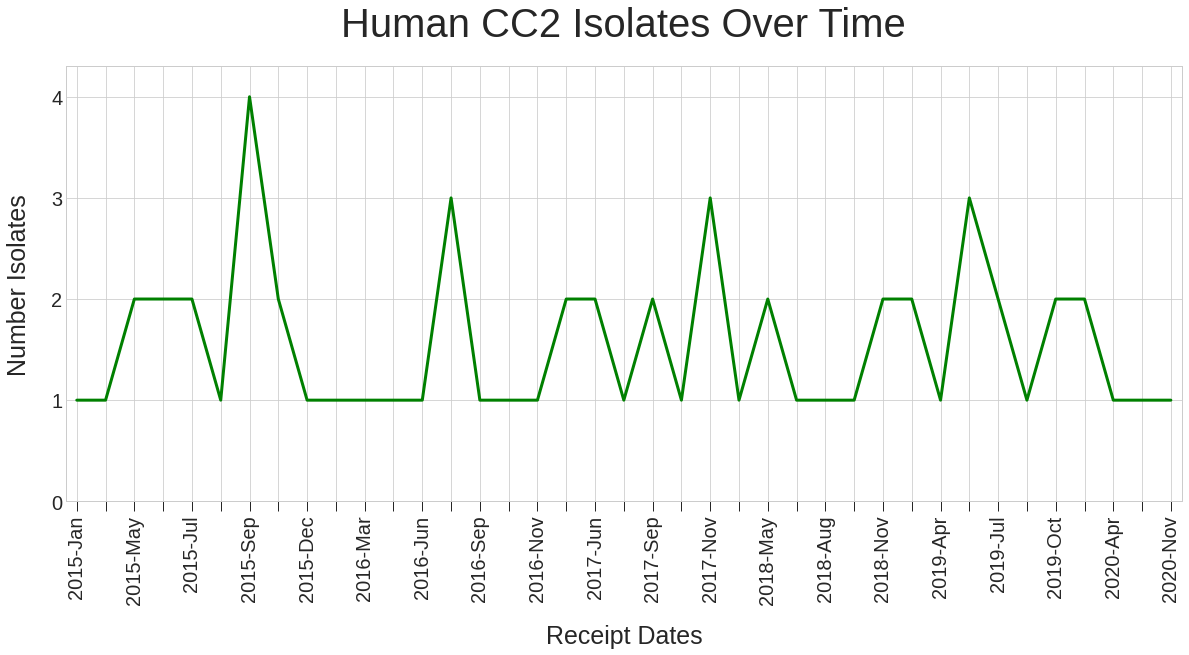

In [54]:
#import seaborn library for plot visualisation
import seaborn as sns

#set figure parameters  
plt.style.use("seaborn-whitegrid")
plt.rcParams["xtick.major.size"]= 10
plt.rcParams["xtick.major.width"]= 1
fig = plt.figure(figsize=(20,8))
#adjust white space in axis
plt.margins(0.01,0.1)

#setting dates in the right numberical format for x-axis
x_dates = time_hum["Receipt M-Y"].dt.strftime("%Y-%b")
x_range = np.arange(len(x_dates))

#plot
plot = sns.lineplot(x_range, time_hum["No Isolates"], color="green", linewidth=3)#, label="Snapper")

#axis labels
plt.xlabel("Receipt Dates", fontsize=25, labelpad=20)
plt.ylabel("Number Isolates", fontsize=25, labelpad=20)

#set x and y-axis markers and labels
plt.xticks(x_range, x_dates, fontsize=20, rotation=90)
plt.yticks(np.arange(0,5), fontsize=20)

#skip every other tick marker point on axis
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

#set Tittle for figure
plt.title("Human CC2 Isolates Over Time", fontsize=40, pad=30)

#display figure
plt.show()

# 3. Where

# Display clinical cases on map

#### detect temporal signal on cases and see geographic distribution

In [56]:
#inport libraries for map plot
import geopandas as gpd
import plotly.express as px
import fiona ?????? REMOVE????

#### to plot a map with geopandas a shape file (.shp) is required. 
#### for analysis all files containing geographic information where downloaded from the ONS site

In [91]:
#import shape file and files with postcode information
shape = gpd.read_file("/directory/shape_file.shp")#national_postcodes = pd.read_csv("postcodes.csv")
national_postcodes = national_postcodes[["Postcode 3", "Longitude", "Latitude"]]
national_postcodes.rename(columns = {'Postcode 3':'Postcode'}, inplace = True)

KeyError: "['Postcode 3'] not in index"

In [67]:
#add postcode information on human dataset
human_lon_lat = pd.merge(human, national_postcodes, on="Postcode", how="left")

In [89]:
#convert dataset to correct format with geopandas for map plot
hum_geo = gpd.GeoDataFrame(human_lon_lat, 
                           geometry = gpd.points_from_xy(human_lon_lat["Longitude"], 
                                                         human_lon_lat["Latitude"]))

In [61]:
#add UK population size so generate heatmap of population density
popsize = pd.read_excel("/directory/uk_population.xls", 
                        sheet_name = "MYE2 - Persons", skiprows=range(1,7), header=1)
popsize.rename(columns = {'Name':'LAD21NM'}, inplace = True)
popsize = popsize[["LAD21NM", "All ages"]]
popsize.head()

,LAD21NM,All ages
0,UNITED KINGDOM,67081234
1,GREAT BRITAIN,65185724
2,ENGLAND AND WALES,59719724
3,ENGLAND,56550138
4,NORTH EAST,2680763


In [69]:
#add population size on shape file
shape = pd.merge(shape, popsize, on="LAD21NM", how="left")
shape.head()

,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry,All ages_x,All ages_y
0,1,E06000001,Hartlepool,447160,531474,-1.27018,54.676140,66110.011028,9.835107e+07,"POLYGON ((-1.26846 54.72612, -1.26822 54.72609...",93836.0,93836.0
1,2,E06000002,Middlesbrough,451141,516887,-1.21099,54.544670,41055.789790,5.455359e+07,"POLYGON ((-1.25112 54.59153, -1.24953 54.59151...",141285.0,141285.0
2,3,E06000003,Redcar and Cleveland,464361,519597,-1.00608,54.567520,105292.103526,2.537854e+08,"POLYGON ((-1.14105 54.64773, -1.13798 54.64737...",137228.0,137228.0
3,4,E06000004,Stockton-on-Tees,444940,518183,-1.30664,54.556911,108085.190140,2.097308e+08,"POLYGON ((-1.31729 54.64480, -1.31715 54.64480...",197419.0,197419.0
4,5,E06000005,Darlington,428029,515648,-1.56835,54.535339,107203.152334,1.974778e+08,"POLYGON ((-1.63768 54.61714, -1.63767 54.61670...",107402.0,107402.0


In [65]:
#edit projections for geopandas to register geographic coordinates for longitude and latitude
shape = shape.to_crs(epsg=4326)
df_geo = hum_geo.set_crs(epsg=4326, inplace=True)

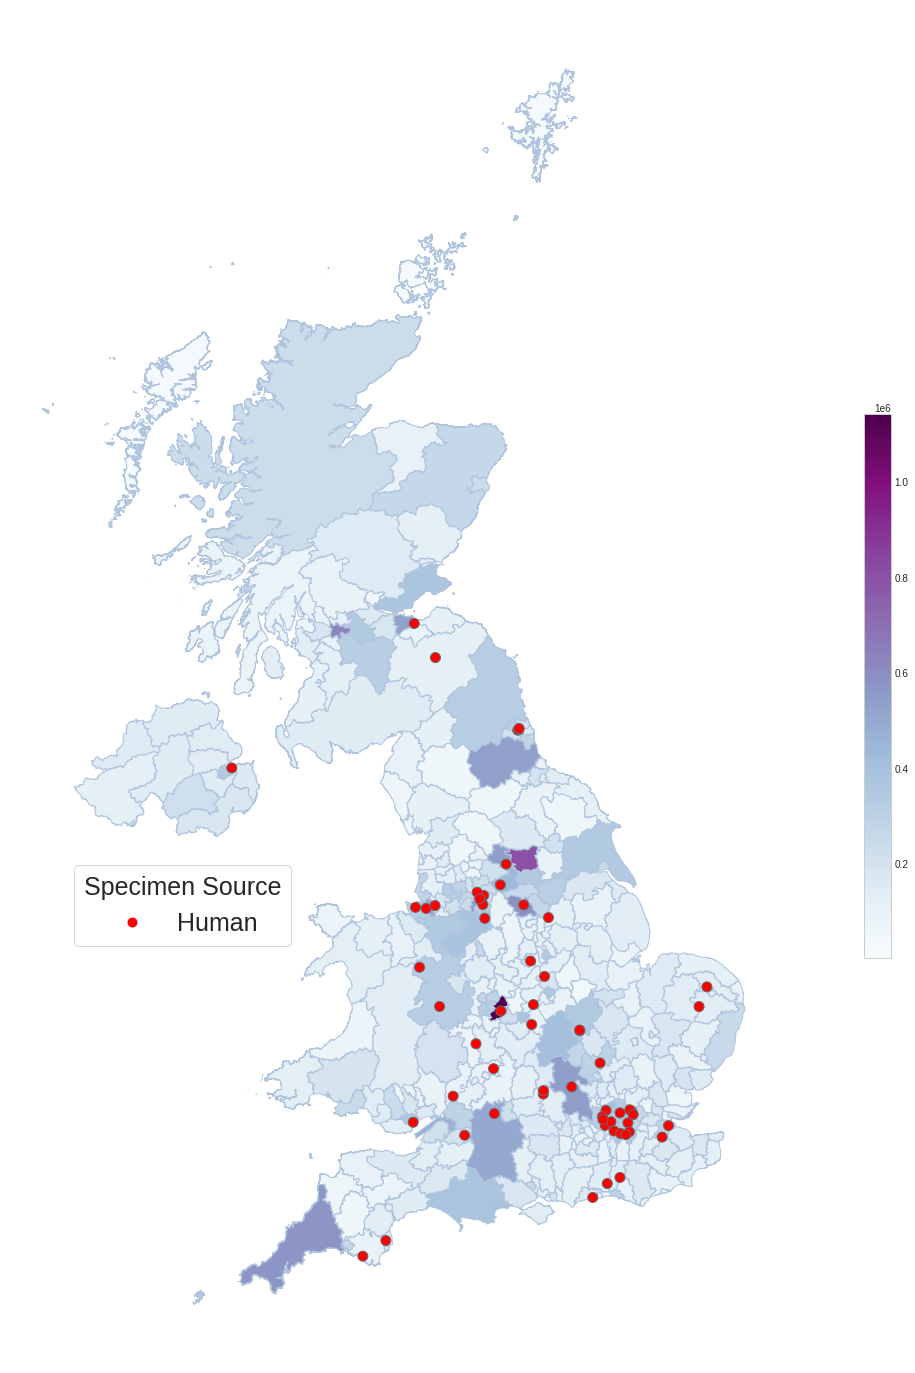

In [66]:
#import libraries and colour palets for map plot
import contextily as cx ?????? CHECK
import matplotlib.colors as colors

color_dict = {"Human":"#ff0000"}

#first plot of the UK map representing the population density as a heat map
base = shape.plot(figsize=(30,25), column="All ages", edgecolor="lightsteelblue", cmap='BuPu', 
                  legend=True, legend_kwds={"orientation":"vertical","pad":(0.05), "shrink":0.4})

#projecting clinical cases on the UK map
df_geo.plot(ax=base,
            column='Specimen Source',
            legend=True,
            edgecolors="dimgray",
            markersize=100,
            legend_kwds={"title":"Specimen Source","loc":"lower left",
                         "frameon": True, "facecolor":"white", 
                         "bbox_to_anchor":(0.07,0.3,0,0), "fontsize":25},
           cmap=colors.ListedColormap(list(color_dict.values())))

#removing axis on figure
plt.axis("off")

# 4. What

# Visualising food groups most commonly sampled from food samples 

# Pre - Analysis

In [70]:
#import food data
env_food = pd.read_excel("/directory/food_samples.xlsx", index_col=[0])
#remove duplocated isolates
env_food = env_food.drop(env_food.loc[env_food["Duplicates?"]=="D"].index)

In [84]:
#edit dates into numerical date format with datatime
env_food["Receipt Date"] = pd.to_datetime(env_food["Receipt Date"], format="%Y-%m-%d")

env_food["Receipt M-Y"] = pd.to_datetime(env_food["Receipt Date"]
                                         , format="%Y-%m").dt.to_period("m")

### Group foods into food categories

In [85]:
food = env_food.loc[env_food["Specimen Source"]=="Food"]

food.loc[food["Surname"].str.contains("ice cream|milk|cheese|brie|cheddar|butter|ICECREAM",
                                      case=False, na=False), "Food Category"]="Dairy"

food.loc[~(food["Food Category"].str.contains("^[A-Z]", case=False, na=False)) & 
         (food["Surname"].str.contains("CHORIZO|SPREAD|parfait|Salami|Roast|SHREDDED|MEAT|sliced|jellied beef|ham|hogs|pate|Lonza", 
                                       case=False)), "Food Category"]="cured meats"

food.loc[~(food["Food Category"].str.contains("^[A-Z]", case=False, na=False)) & 
         (food["Surname"].str.contains("Salmon|COD|TROUT", 
                                       case=False)), "Food Category"]="Fish"

food.loc[~(food["Food Category"].str.contains("^[A-Z]", case=False, na=False)) & 
         (food["Surname"].str.contains("salad|sandw|RTE|CORONATION|Dress|tikka|filling|Rice|Roll|Hoggs|mayo|Spare Ribs in Black Bean Sauce", 
                                       case=False)), "Food Category"]="RTE"

food.loc[~(food["Food Category"].str.contains("^[A-Z]", case=False, na=False)) & 
         (food["Surname"].str.contains("Icing|Doughnut|custard", 
                                       case=False)), "Food Category"]="Baked Goods"

food.loc[~(food["Food Category"].str.contains("^[A-Z]", case=False, na=False)) & 
         (food["Surname"].str.contains("Lettuce|sweetcorn|MELON", 
                                       case=False)), "Food Category"]="Veggies"

/tmp/ipykernel_31230/2394517424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food.loc[food["Surname"].str.contains("ice cream|milk|cheese|brie|cheddar|butter|ICECREAM",


In [75]:
#create table with colour palet and food groups
t = food["Food Category"].value_counts().to_frame()
c = {"Dairy":"#0173b2", "Fish":"gray", "Fruit":"#ff7f00", "RTE":"darkred", 
     "Beef":"#a65628", "Cured meats":"#984ea3", "Raw meat":"#f781bf", "Veggies":"#4daf4a",
    "Baked Goods":"yellow"}

t["colours"]=t.index.to_series().map(c)
t = t.T
t

,cured meats,RTE,Dairy,Veggies,Baked Goods,Fish
Food Category,33,10,4,3,3,2
colours,#984ea3,darkred,#0173b2,#4daf4a,yellow,gray


#### pie chart plot of all food groups

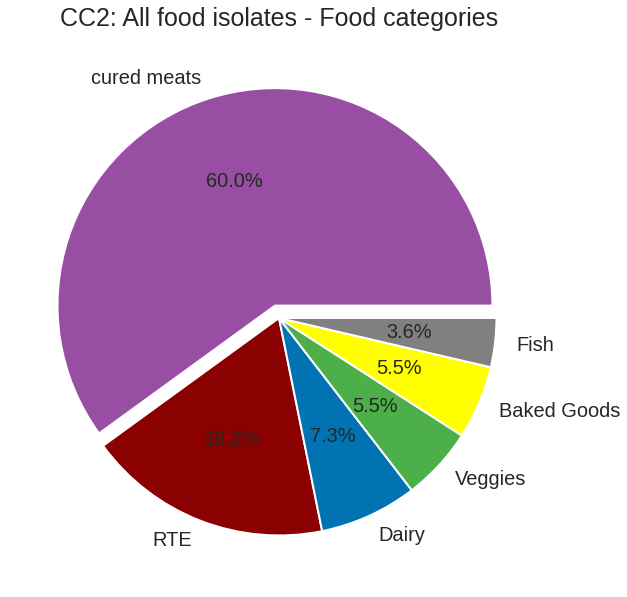

In [76]:
#set figure size
plt.figure(figsize=(10,10))

#set variables for plot
v = t.loc["Food Category"].values

#pie chart plot
plots, text, precent = plt.pie(v, labels=t.columns, colors= t.loc["colours"].values,
autopct="%1.1f%%", textprops={"fontsize":20}, startangle=0,
explode=[0.06,0,0,0,0,0],
wedgeprops={"linewidth":2.0, "edgecolor":"white"})

#set Tittle for figure
plt.title("CC2: All food isolates - Food categories", fontdict={"fontsize":25}, pad=20)

#display plot
plt.show()

#### Deduplicate dataset: 
#### keep a sigle entry for isolates with: 
* the same t5 SNP dirrerence
* the same sequence collection date
* collected at the same location

In [86]:
food_dedup = food.drop_duplicates(subset=["Surname","Receipt M-Y", "SNP Level 5"],keep="first")

#### repeat same steps to generate pie chart plot for deduplicated dataset 

this analysis allows for the investigation and comparison of both raw sample collection and the representative population structure

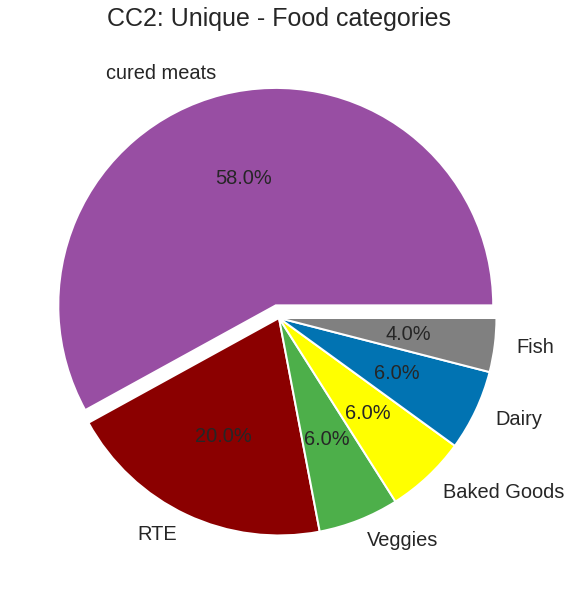

In [82]:
#see code above